<a href="https://colab.research.google.com/github/duchaba/Data-Augmentation-with-Python/blob/main/data_augmentation_with_python_chapter_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Augmentation with Python, Chapter 9

## 🌻 Welcome to Chapter 7, "tabular Augmentation"


There will be a slight departure from the image, text, and audio augmentation format. We will spend more time in Python code studying the real-world tabular dataset, and in particular, in this chapter, we will cover the following topics: 

- Tabular augmentation libraries 

- Real-world tabular datasets 

- Explore and visualize tabular data 

- Transforming augmentation 

- Interacting augmentation 

- Extracting augmentation 

- ✋ STOP: You must set up Kaggle username and app Key in below step.

# Load Notebook


- This Notebook original link is: 
  - https://github.com/PacktPublishing/Data-Augmentation-with-Python/blob/main/data_augmentation_with_python_chapter_9.ipynb

# GitHub Clone

In [2]:
# git version should be 2.17.1 or higher
!git --version

git version 2.25.1


In [3]:
url = 'https://github.com/PacktPublishing/Data-Augmentation-with-Python'
# url = 'https://github.com/duchaba/Data-Augmentation-with-Python'
!git clone {url}

Cloning into 'Data-Augmentation-with-Python'...
remote: Enumerating objects: 58, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 58 (delta 21), reused 17 (delta 8), pack-reused 22
Unpacking objects: 100% (58/58), 4.23 MiB | 7.90 MiB/s, done.


## Fetch file from URL (Optional)

- Uncommend the below 2 code cells if you want to use URL and not Git Clone

In [4]:
# import requests
# #
# def fetch_file(url, dst):
#   downloaded_obj = requests.get(url)
#   with open(dst, "wb") as file:
#     file.write(downloaded_obj.content)
#   return

In [5]:
# url = ''
# dst = 'pluto_chapter_1.py'
# fetch_file(url,dst)

# Run Pluto

- Instantiate up Pluto, aka. "Pluto, wake up!"

In [6]:
# %% CARRY-OVER code install

!pip install opendatasets --upgrade
!pip install pyspellchecker 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 26.5 MB/s eta 0:00:00


In [7]:
#load and run the pluto chapter 1 Python code.
pluto_file = 'Data-Augmentation-with-Python/pluto/pluto_chapter_2.py'
%run {pluto_file}

---------------------------- : ----------------------------
            Hello from class : <class '__main__.PacktDataAug'> Class: PacktDataAug
                   Code name : Pluto
                   Author is : Duc Haba
---------------------------- : ----------------------------


## Verify Pluto

In [8]:
pluto.say_sys_info()

---------------------------- : ----------------------------
                 System time : 2023/02/02 17:49
                    Platform : linux
     Pluto Version (Chapter) : 2.0
             Python (3.7.10) : actual: 3.8.10 (default, Nov 14 2022, 12:59:47) [GCC 9.4.0]
            PyTorch (1.11.0) : actual: 1.13.1+cu116
              Pandas (1.3.5) : actual: 1.3.5
                 PIL (9.0.0) : actual: 7.1.2
          Matplotlib (3.2.2) : actual: 3.2.2
                   CPU count : 2
                  *CPU speed : NOT available
---------------------------- : ----------------------------


## (Optional) Export to .py

In [9]:
pluto_chapter_9 = 'Data-Augmentation-with-Python/pluto/pluto_chapter_9.py'
!cp {pluto_file} {pluto_chapter_9}

# ✋ Set up Kaggle username and app Key

- Install the following libraries, and import it on the Notebook.
- Follow by initialize Kaggle username, key and fetch methods.

- STOP: Update your Kaggle access username or key first.

In [10]:
# %%CARRY-OVER code 

# -------------------- : --------------------
# READ ME
# Chapter 2 begin:
# Install the following libraries, and import it on the Notebook.
# Follow by initialize Kaggle username, key and fetch methods.
# STOP: Update your Kaggle access username or key first.
# -------------------- : --------------------

!pip install opendatasets --upgrade
import opendatasets
print("\nrequired version 0.1.22 or higher: ", opendatasets.__version__)

!pip install pyspellchecker 
import spellchecker
print("\nRequired version 0.7+", spellchecker.__version__)

# STOP: Update your Kaggle access username or key first.
pluto.remember_kaggle_access_keys("duchaba", "059d7f10e1838693868b30e9dbb7c8ce")
pluto._write_kaggle_credit()
import kaggle

@add_method(PacktDataAug)
def fetch_kaggle_comp_data(self,cname):
  #self._write_kaggle_credit()  # need to run only once.
  path = pathlib.Path(cname)
  kaggle.api.competition_download_cli(str(path))
  zipfile.ZipFile(f'{path}.zip').extractall(path)
  return

@add_method(PacktDataAug)
def fetch_kaggle_dataset(self,url,dest="kaggle"):
  #self._write_kaggle_credit()    # need to run only once.
  opendatasets.download(url,data_dir=dest)
  return
# -------------------- : --------------------


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

required version 0.1.22 or higher:  0.1.22
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

Required version 0.7+ 0.7.1


# Fetch Kaggle Bank Account Fraud Dataset Suite (NeurIPS 2022)

In [11]:
%%time
url = 'https://www.kaggle.com/datasets/sgpjesus/bank-account-fraud-dataset-neurips-2022'
pluto.fetch_kaggle_dataset(url)

100%|██████████| 546M/546M [00:04<00:00, 115MB/s]



CPU times: user 14.5 s, sys: 4.48 s, total: 19 s
Wall time: 35 s


In [12]:
f = '/content/kaggle/bank-account-fraud-dataset-neurips-2022/Base.csv'
pluto.df_bank_data = pluto.fetch_df(f)
pluto.df_bank_data.head(3)

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,1,0.9,0.166828,-1,88,50,0.020925,-1.331345,AA,769,...,0,500.0,0,INTERNET,3.888115,windows,0,1,0,7
1,1,0.9,0.296286,-1,144,50,0.005418,-0.816224,AB,366,...,0,1500.0,0,INTERNET,31.798819,windows,0,1,0,7
2,1,0.9,0.044985,-1,132,40,3.108549,-0.755728,AC,870,...,0,200.0,0,INTERNET,4.728705,other,0,1,0,7


In [16]:
pluto.df_bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

In [13]:
pluto.df_bank_data[['fraud_bool', 
  'proposed_credit_limit',
  'customer_age', 
  'payment_type']].sample(5)

,fraud_bool,proposed_credit_limit,customer_age,payment_type
721689,0,500.0,30,AA
409031,0,500.0,40,AB
561649,0,200.0,40,AC
86784,0,200.0,40,AB
517738,0,200.0,30,AA


In [14]:
# Transpose for easier to read
df = pluto.df_bank_data.describe()
df = df.transpose()
df

,count,mean,std,min,25%,50%,75%,max
fraud_bool,1000000.0,0.011029,0.104438,0.000000e+00,0.000000,0.000000,0.000000,1.000000
income,1000000.0,0.562696,0.290343,1.000000e-01,0.300000,0.600000,0.800000,0.900000
name_email_similarity,1000000.0,0.493694,0.289125,1.434550e-06,0.225216,0.492153,0.755567,0.999999
prev_address_months_count,1000000.0,16.718568,44.046230,-1.000000e+00,-1.000000,-1.000000,12.000000,383.000000
current_address_months_count,1000000.0,86.587867,88.406599,-1.000000e+00,19.000000,52.000000,130.000000,428.000000
customer_age,1000000.0,33.689080,12.025799,1.000000e+01,20.000000,30.000000,40.000000,90.000000
days_since_request,1000000.0,1.025705,5.381835,4.036860e-09,0.007193,0.015176,0.026331,78.456904
intended_balcon_amount,1000000.0,8.661499,20.236155,-1.553055e+01,-1.181488,-0.830507,4.984176,112.956928
zip_count_4w,1000000.0,1572.692049,1005.374565,1.000000e+00,894.000000,1263.000000,1944.000000,6700.000000
velocity_6h,1000000.0,5665.296605,3009.380665,-1.706031e+02,3436.365848,5319.769349,7680.717827,16715.565404


In [15]:
df[['count','mean','std','min','max']]

,count,mean,std,min,max
fraud_bool,1000000.0,0.011029,0.104438,0.000000e+00,1.000000
income,1000000.0,0.562696,0.290343,1.000000e-01,0.900000
name_email_similarity,1000000.0,0.493694,0.289125,1.434550e-06,0.999999
prev_address_months_count,1000000.0,16.718568,44.046230,-1.000000e+00,383.000000
current_address_months_count,1000000.0,86.587867,88.406599,-1.000000e+00,428.000000
customer_age,1000000.0,33.689080,12.025799,1.000000e+01,90.000000
days_since_request,1000000.0,1.025705,5.381835,4.036860e-09,78.456904
intended_balcon_amount,1000000.0,8.661499,20.236155,-1.553055e+01,112.956928
zip_count_4w,1000000.0,1572.692049,1005.374565,1.000000e+00,6700.000000
velocity_6h,1000000.0,5665.296605,3009.380665,-1.706031e+02,16715.565404


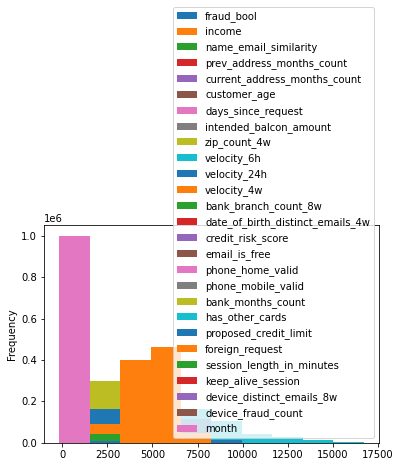

In [17]:
# check out in graph of 32 millions point
# don't use line or scater plot because it will run out of system memory
pluto.df_bank_data.plot.hist()

In [ ]:
pluto.df_bank_data.nunique()

fraud_bool                               2
income                                   9
name_email_similarity               998861
prev_address_months_count              374
current_address_months_count           423
customer_age                             9
days_since_request                  989330
intended_balcon_amount              994971
payment_type                             5
zip_count_4w                          6306
velocity_6h                         998687
velocity_24h                        998940
velocity_4w                         998318
bank_branch_count_8w                  2326
date_of_birth_distinct_emails_4w        40
employment_status                        7
credit_risk_score                      551
email_is_free                            2
housing_status                           7
phone_home_valid                         2
phone_mobile_valid                       2
bank_months_count                       33
has_other_cards                          2
proposed_cr

In [ ]:
pluto.df_bank_data.income.unique()

array([0.9, 0.3, 0.7, 0.6, 0.4, 0.2, 0.8, 0.1, 0.5])

In [ ]:
pluto.df_bank_data.customer_age.unique()

array([50, 40, 30, 20, 70, 60, 80, 10, 90])

### object type

In [ ]:
pluto.df_bank_data.payment_type.unique()

array(['AA', 'AB', 'AC', 'AD', 'AE'], dtype=object)

In [ ]:
pluto.df_bank_data.employment_status.unique()

array(['CA', 'CB', 'CC', 'CD', 'CE', 'CF', 'CG'], dtype=object)

In [ ]:
pluto.df_bank_data.housing_status.unique()

array(['BA', 'BB', 'BC', 'BD', 'BE', 'BF', 'BG'], dtype=object)

In [ ]:
pluto.df_bank_data.source.unique()

array(['INTERNET', 'TELEAPP'], dtype=object)

In [ ]:
pluto.df_bank_data.device_os.unique()

array(['windows', 'other', 'linux', 'macintosh', 'x11'], dtype=object)

### tokenenize

In [ ]:
@add_method(PacktDataAug)
def _fetch_token_index(self, val, xarr):
  for i, x in enumerate(xarr):
    if (val == x):
      return i
#
@add_method(PacktDataAug)
def add_token_index(self,df, df_colname):
  for cname in df_colname:
    tname = cname + "_tokenize"
    arrname = numpy.array(df[cname].unique())
    df[tname] = df[cname].apply(self._fetch_token_index, args=(arrname,))
  return


In [ ]:
pluto.df_bank_tokenize_data = pluto.df_bank_data.copy()

In [ ]:
pluto.add_token_index(pluto.df_bank_tokenize_data, 
  ['payment_type', 'employment_status', 'housing_status', 'source', 'device_os'])

In [ ]:
pluto.df_bank_tokenize_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 37 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

In [ ]:
pluto.df_bank_tokenize_data[['payment_type', 'payment_type_tokenize']].head(10)

,payment_type,payment_type_tokenize
0,AA,0
1,AB,1
2,AC,2
3,AB,1
4,AB,1
5,AD,3
6,AB,1
7,AB,1
8,AB,1
9,AB,1


In [ ]:
pluto.df_bank_tokenize_data[['device_os', 'device_os_tokenize']].head(10)

,device_os,device_os_tokenize
0,windows,0
1,windows,0
2,other,1
3,linux,2
4,macintosh,3
5,windows,0
6,windows,0
7,linux,2
8,windows,0
9,windows,0


In [ ]:
pluto.df_bank_tokenize_data = pluto.df_bank_tokenize_data.drop(['payment_type', 'employment_status', 'housing_status', 'source', 'device_os'], axis=1)

In [ ]:
pluto.df_bank_tokenize_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   zip_count_4w                      1000000 non-null  int64  
 9   velocity_6h                       1000000 non-null  float64
 10  velocity_24h                      1000000 non-null  float64
 11  velocity_4w                       1000

In [ ]:
# %%time
# import matplotlib
# fig, ax = matplotlib.pyplot.subplots(figsize=(12,6))
# ax = pandas.plotting.andrews_curves(pluto.df_bank_tokenize_data.sample(10000), 'payment_type_tokenize', colormap='rainbow')
# fig.show()

In [ ]:
# %%time
# import matplotlib
# fig, ax = matplotlib.pyplot.subplots(figsize=(12,6))
# ax = pandas.plotting.andrews_curves(pluto.df_bank_tokenize_data.sample(10000), 'payment_type_tokenize', colormap='rainbow')
# fig.show()

In [ ]:
pluto.df_bank_tokenize_data['fraud_bool'].mask(pluto.df_bank_tokenize_data['fraud_bool'] == 0, 2, inplace=True)

In [ ]:
pluto.df_bank_tokenize_data['checksum'] = pluto.df_bank_tokenize_data.apply(
  lambda x: numpy.mean(tuple(x)), axis=1
)

In [ ]:
pluto.df_bank_tokenize_data['checksum'].head(4)

0    602.636794
1    294.576502
2    361.149155
3    428.129864
Name: checksum, dtype: float64

In [ ]:
# fig, ax = matplotlib.pyplot.subplots(figsize=(12,6))
# pluto.df_bank_tokenize_data.plot.hexbin(x='checksum', y='employment_status_tokenize', gridsize=20, ax=ax)
# fig.show()

In [ ]:
# fig, ax = matplotlib.pyplot.subplots(figsize=(12,6))
# pluto.df_bank_tokenize_data['checksum'].plot.hist(ax=ax, histtype='bar',orientation='horizontal')
# fig.show()

In [ ]:
import seaborn

In [ ]:
# fig, ax = matplotlib.pyplot.subplots(figsize=(12,6))
# seaborn.histplot(data=pluto.df_bank_tokenize_data, x='checksum',ax=ax)
# fig.show()

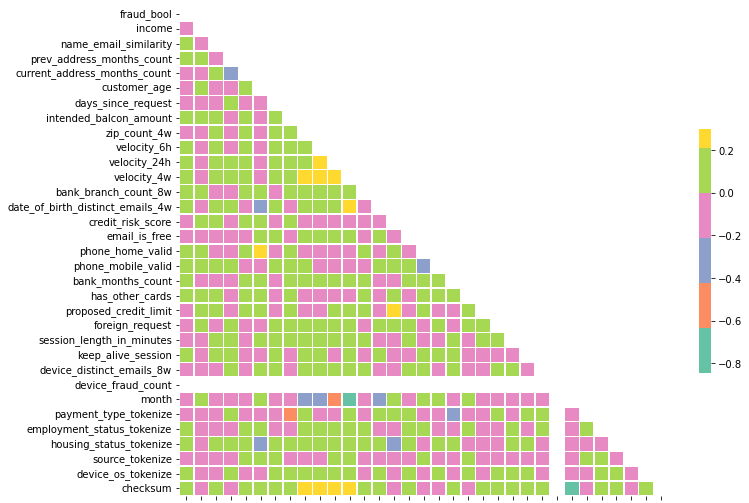

In [ ]:
# Compute the correlation matrix
corr = pluto.df_bank_tokenize_data.corr()

# Generate a mask for the upper triangle
mask = numpy.triu(numpy.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
fig, ax = matplotlib.pyplot.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = seaborn.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
seaborn.heatmap(corr, mask=mask, cmap='Set2', vmax=.3, center=0,
  square=True, linewidths=.5, cbar_kws={"shrink": .5},
  ax=ax)
#
ax.set_xticklabels([])
fig.show()

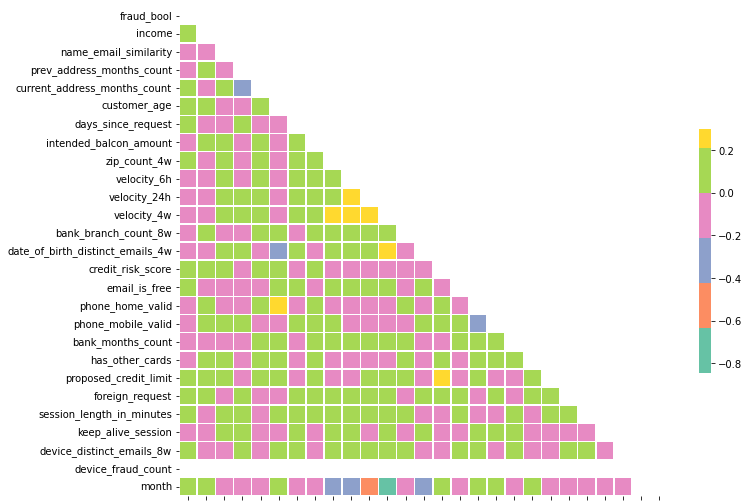

In [ ]:
# Compute the correlation matrix
corr = pluto.df_bank_data.corr()

# Generate a mask for the upper triangle
mask = numpy.triu(numpy.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
fig, ax = matplotlib.pyplot.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = seaborn.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
seaborn.heatmap(corr, mask=mask, cmap='Set2', vmax=.3, center=0,
  square=True, linewidths=.5, cbar_kws={"shrink": .5},
  ax=ax)
#
ax.set_xticklabels([])
fig.show()

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 13.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


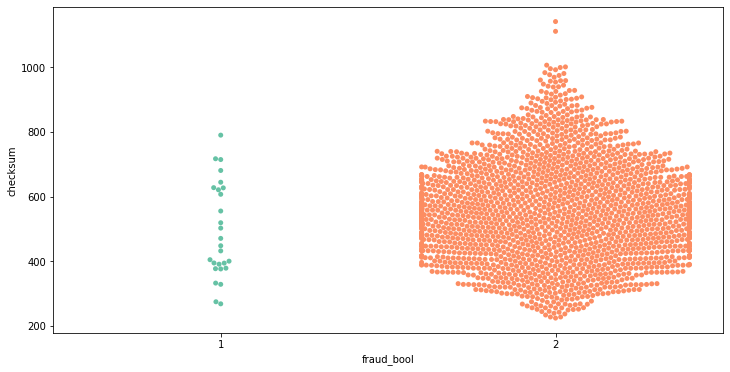

In [ ]:
# sns.jointplot(x=x, y=y, kind="hex", color="#4CB391")
fig, ax = matplotlib.pyplot.subplots(figsize=(12,6))
seaborn.swarmplot(data=pluto.df_bank_tokenize_data.sample(2000),
  x='fraud_bool', 
  y='checksum', 
  palette="Set2",
  ax=ax)
fig.show()

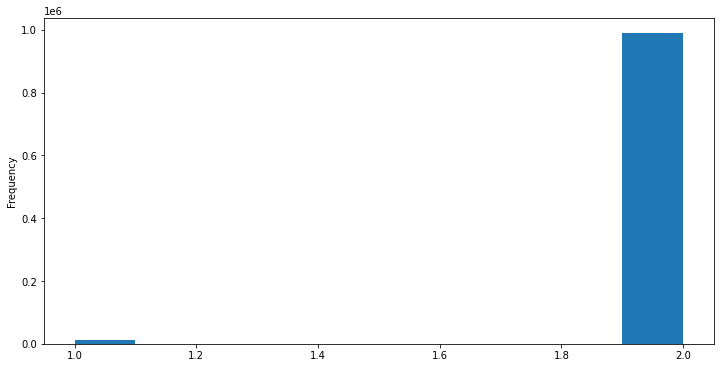

In [ ]:
fig, ax = matplotlib.pyplot.subplots(figsize=(12,6))
pluto.df_bank_tokenize_data['fraud_bool'].plot.hist(ax=ax, histtype='bar')
fig.show()

### Varient 1

In [ ]:
# remove white space in directory and filename
# run this until no error/output
f = 'kaggle/bank-account-fraud-dataset-neurips-2022'
#!find {f} -name "* *" -type d | rename 's/ /_/g'
!find {f} -name "* *" -type f | rename 's/ /_/g'

In [ ]:
f = '/content/kaggle/bank-account-fraud-dataset-neurips-2022/Variant_I.csv'
pluto.df_bank_v1_data = pluto.fetch_df(f)
pluto.df_bank_v1_data.head(3)

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.6,0.252681,-1,188,20,0.021614,-0.266603,AC,2596,...,0,1000.0,1,INTERNET,7.634858,linux,0,1,0,5
1,0,0.9,0.185206,-1,51,30,0.001696,-1.191015,AD,898,...,0,1500.0,0,INTERNET,5.408299,other,0,1,0,4
2,0,0.1,0.505509,-1,187,20,0.011880,-1.252679,AB,2851,...,0,500.0,0,INTERNET,9.401087,linux,1,1,0,5


In [ ]:
%%time
pluto.df_bank_v1_tokenize_data = pluto.df_bank_v1_data.copy()
pluto.add_token_index(pluto.df_bank_v1_tokenize_data, 
  ['payment_type', 'employment_status', 'housing_status', 'source', 'device_os'])
pluto.df_bank_v1_tokenize_data = pluto.df_bank_v1_tokenize_data.drop(
  ['payment_type', 'employment_status', 'housing_status', 'source', 'device_os'], 
  axis=1)
pluto.df_bank_v1_tokenize_data['checksum'] = pluto.df_bank_v1_tokenize_data.apply(
  lambda x: numpy.mean(tuple(x)), axis=1
)

CPU times: user 30.5 s, sys: 311 ms, total: 30.8 s
Wall time: 30.9 s


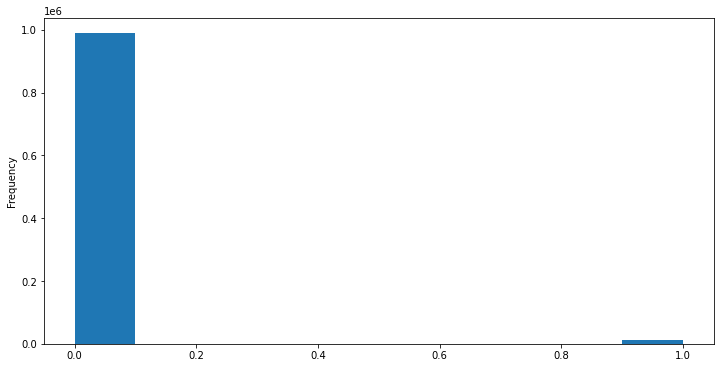

In [ ]:
fig, ax = matplotlib.pyplot.subplots(figsize=(12,6))
pluto.df_bank_v1_tokenize_data['fraud_bool'].plot.hist(ax=ax, histtype='bar')
fig.show()

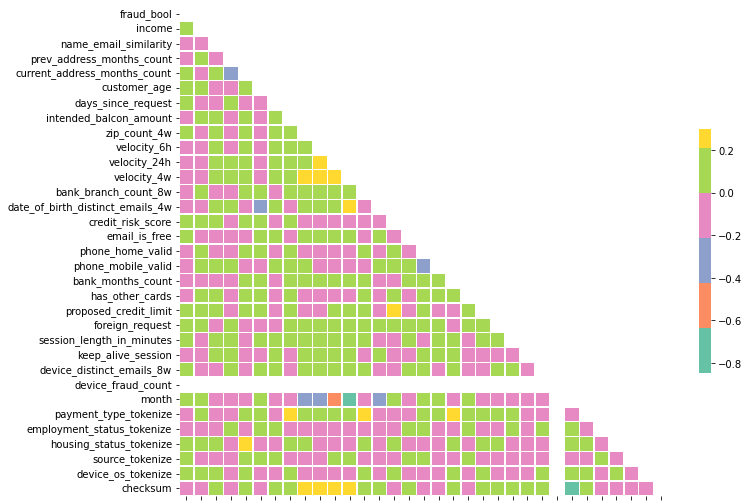

In [ ]:
# Compute the correlation matrix
corr = pluto.df_bank_v1_tokenize_data.corr()

# Generate a mask for the upper triangle
mask = numpy.triu(numpy.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
fig, ax = matplotlib.pyplot.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = seaborn.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
seaborn.heatmap(corr, mask=mask, cmap='Set2', vmax=.3, center=0,
  square=True, linewidths=.5, cbar_kws={"shrink": .5},
  ax=ax)
#
ax.set_xticklabels([])
fig.show()

In [ ]:
pluto.df_bank_v1_tokenize_data.device_fraud_count.unique()

array([0])

In [ ]:
pluto.df_bank_v1_tokenize_data.device_fraud_count.unique()

array([0])

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 12.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


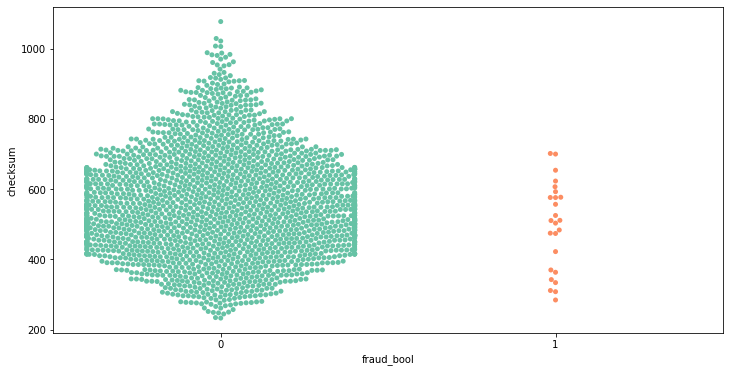

In [ ]:
fig, ax = matplotlib.pyplot.subplots(figsize=(12,6))
seaborn.swarmplot(data=pluto.df_bank_v1_tokenize_data.sample(2000),
  x='fraud_bool', 
  y='checksum', 
  palette="Set2",
  ax=ax)
fig.show()

# World Series Baseball Television Ratings

In [ ]:
%%time
f = 'https://www.kaggle.com/datasets/mattop/world-series-baseball-television-ratings'
pluto.fetch_kaggle_dataset(f)

100%|██████████| 2.20k/2.20k [00:00<00:00, 1.68MB/s]


CPU times: user 41.9 ms, sys: 6.12 ms, total: 48.1 ms
Wall time: 658 ms


In [ ]:
f = '/content/kaggle/world-series-baseball-television-ratings/world-series-ratings.csv'
pluto.df_world_data = pluto.fetch_df(f)
pluto.df_world_data.head(3)

,year,network,average_audience,game_1_audience,game_2_audience,game_3_audience,game_4_audience,game_5_audience,game_6_audience,game_7_audience,total_games_played,winning_team,losing_team,losing_team_wins
0,2022,Fox,11762000,11475000.0,10789000.0,11162000.0,11809000.0,12786000.0,12549000.0,NaN,6,Houston Astros,Philadelphia Phillies,2
1,2021,Fox,11744000,10811000.0,10280000.0,11232000.0,10511000.0,13644000.0,13986000.0,NaN,6,Atlanta Braves,Houston Astros,2
2,2020,Fox,9785000,9195000.0,8950000.0,8156000.0,9332000.0,10059000.0,12627000.0,NaN,6,Los Angeles Dodgers,Tampa Bay Rays,2


In [ ]:
pluto.df_world_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                54 non-null     int64  
 1   network             54 non-null     object 
 2   average_audience    54 non-null     int64  
 3   game_1_audience     53 non-null     float64
 4   game_2_audience     52 non-null     float64
 5   game_3_audience     53 non-null     float64
 6   game_4_audience     53 non-null     float64
 7   game_5_audience     44 non-null     float64
 8   game_6_audience     31 non-null     float64
 9   game_7_audience     18 non-null     float64
 10  total_games_played  54 non-null     int64  
 11  winning_team        54 non-null     object 
 12  losing_team         54 non-null     object 
 13  losing_team_wins    54 non-null     int64  
dtypes: float64(7), int64(4), object(3)
memory usage: 6.0+ KB


In [ ]:
pluto.df_world_data.nunique()

year                  53
network                4
average_audience      53
game_1_audience       53
game_2_audience       52
game_3_audience       51
game_4_audience       53
game_5_audience       44
game_6_audience       31
game_7_audience       18
total_games_played     4
winning_team          23
losing_team           22
losing_team_wins       4
dtype: int64

In [ ]:
%%time
pluto.df_world_tokenize_data = pluto.df_world_data.copy()
pluto.df_world_tokenize_data = pluto.df_world_tokenize_data.fillna(0)
pluto.add_token_index(pluto.df_world_tokenize_data, 
  ['network', 'winning_team', 'losing_team'])
pluto.df_world_tokenize_data = pluto.df_world_tokenize_data.drop(
  ['network', 'winning_team', 'losing_team'], 
  axis=1)
pluto.df_world_tokenize_data['checksum'] = pluto.df_world_tokenize_data.apply(
  lambda x: numpy.mean(tuple(x)), axis=1
)

CPU times: user 13 ms, sys: 0 ns, total: 13 ms
Wall time: 13.4 ms


In [ ]:
pluto.df_world_tokenize_data.describe()

,year,average_audience,game_1_audience,game_2_audience,game_3_audience,game_4_audience,game_5_audience,game_6_audience,game_7_audience,total_games_played,losing_team_wins,network_tokenize,winning_team_tokenize,losing_team_tokenize,checksum
count,54.000000,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,54.000000,54.000000,54.000000,54.000000,54.000000,5.400000e+01
mean,1995.518519,2.466182e+07,2.192911e+07,2.241176e+07,2.273620e+07,2.309263e+07,2.040563e+07,1.655689e+07,1.332961e+07,5.777778,1.777778,0.833333,10.444444,10.388889,1.179469e+07
std,15.730922,9.512589e+06,9.452905e+06,1.027371e+07,1.062393e+07,9.554056e+06,1.401900e+07,1.672910e+07,1.991058e+07,1.093146,1.093146,0.946692,6.546399,5.922189,5.524379e+06
min,1969.000000,9.785000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000,0.000000,0.000000,0.000000,0.000000,4.512431e+06
25%,1982.250000,1.598925e+07,1.492600e+07,1.382400e+07,1.321650e+07,1.549800e+07,1.170125e+07,0.000000e+00,0.000000e+00,5.000000,1.000000,0.000000,5.250000,5.000000,7.353448e+06
50%,1995.500000,2.453900e+07,2.025050e+07,1.999100e+07,2.208000e+07,2.241550e+07,1.828050e+07,1.520550e+07,0.000000e+00,6.000000,2.000000,1.000000,9.000000,10.000000,1.039932e+07
75%,2008.750000,3.374468e+07,2.716050e+07,3.077250e+07,3.245500e+07,3.103500e+07,3.151500e+07,2.908000e+07,3.017050e+07,7.000000,3.000000,1.000000,16.750000,15.000000,1.480568e+07
max,2022.000000,4.427900e+07,4.351000e+07,4.299000e+07,4.381000e+07,3.922000e+07,4.899000e+07,5.486000e+07,5.500000e+07,7.000000,3.000000,3.000000,22.000000,21.000000,2.214364e+07


In [ ]:
pluto.df_world_tokenize_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year                   54 non-null     int64  
 1   average_audience       54 non-null     int64  
 2   game_1_audience        54 non-null     float64
 3   game_2_audience        54 non-null     float64
 4   game_3_audience        54 non-null     float64
 5   game_4_audience        54 non-null     float64
 6   game_5_audience        54 non-null     float64
 7   game_6_audience        54 non-null     float64
 8   game_7_audience        54 non-null     float64
 9   total_games_played     54 non-null     int64  
 10  losing_team_wins       54 non-null     int64  
 11  network_tokenize       54 non-null     int64  
 12  winning_team_tokenize  54 non-null     int64  
 13  losing_team_tokenize   54 non-null     int64  
 14  checksum               54 non-null     float64
dtypes: float

In [ ]:
# pluto.df_world_tokenize_data = pluto.df_world_tokenize_data.fillna(0)

In [ ]:
pluto.df_world_tokenize_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year                   54 non-null     int64  
 1   average_audience       54 non-null     int64  
 2   game_1_audience        54 non-null     float64
 3   game_2_audience        54 non-null     float64
 4   game_3_audience        54 non-null     float64
 5   game_4_audience        54 non-null     float64
 6   game_5_audience        54 non-null     float64
 7   game_6_audience        54 non-null     float64
 8   game_7_audience        54 non-null     float64
 9   total_games_played     54 non-null     int64  
 10  losing_team_wins       54 non-null     int64  
 11  network_tokenize       54 non-null     int64  
 12  winning_team_tokenize  54 non-null     int64  
 13  losing_team_tokenize   54 non-null     int64  
 14  checksum               54 non-null     float64
dtypes: float

In [ ]:
# g = seaborn.FacetGrid(pluto.df_world_tokenize_data[['game_1_audience','game_2_audience', 'game_2_audience']], 
#   row="g", hue="g", aspect=15, height=.5, palette=pal)

# # Draw the densities in a few steps
# g.map(seaborn.kdeplot, "x",
#       bw_adjust=.5, clip_on=False,
#       fill=True, alpha=1, linewidth=1.5)
# g.map(seaborn.kdeplot, "x", clip_on=False, color="w", lw=2, bw_adjust=.5)

# # passing color=None to refline() uses the hue mapping
# g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

In [ ]:
!pip install joypy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import joypy
# # Import Data
# mpg = pandas.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

# # Draw Plot
# matplotlib.pyplot.figure(figsize=(16,10), dpi= 80)
# fig, axes = joypy.joyplot(mpg, column=['hwy', 'cty'], by="class", ylim='own', figsize=(14,10))

# # Decoration
# matplotlib.pyplot.title('Joy Plot of City and Highway Mileage by Class', fontsize=22)
# matplotlib.pyplot.show()

In [ ]:
# mpg.head()

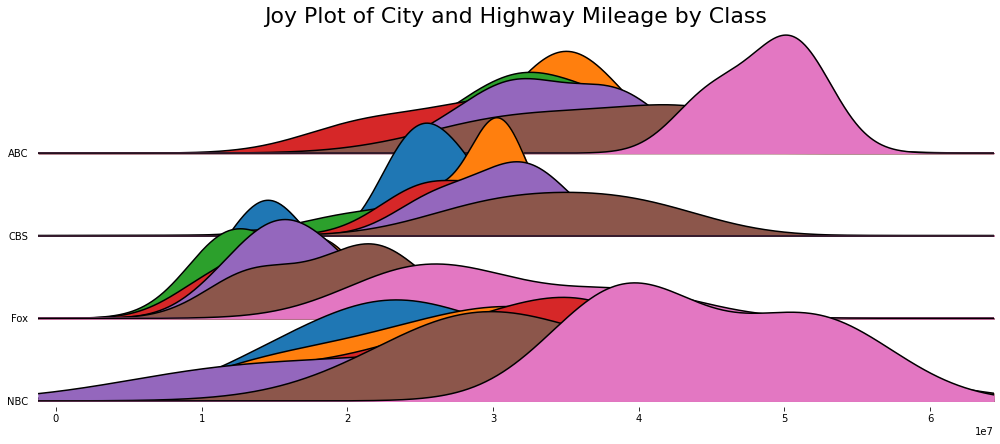

In [ ]:
import joypy
# Import Data
# mpg = pandas.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

# Draw Plot
# matplotlib.pyplot.figure(figsize=(16,10))
fig, axes = joypy.joyplot(pluto.df_world_data, 
  column=['game_1_audience', 'game_2_audience', 'game_3_audience',
          'game_4_audience', 'game_5_audience', 'game_6_audience', 'game_7_audience'], 
  by="network", 
  ylim='own', figsize=(14,6),
  overlap=1)

# Decoration
matplotlib.pyplot.title('Joy Plot of City and Highway Mileage by Class', fontsize=22)
matplotlib.pyplot.show()

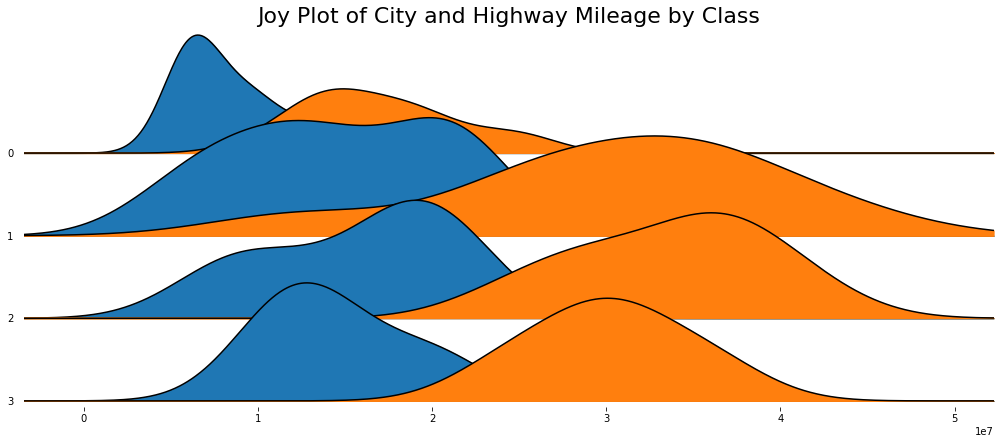

In [ ]:
fig, axes = joypy.joyplot(pluto.df_world_tokenize_data, 
  column=['checksum', 'average_audience'], 
  by="network_tokenize", 
  ylim='own', figsize=(14,6),
  overlap=1)

# Decoration
matplotlib.pyplot.title('Joy Plot of City and Highway Mileage by Class', fontsize=22)
matplotlib.pyplot.show()

In [ ]:
# # matplotlib.pyplot.figure(figsize=(16,10))
# fig, axes = joypy.joyplot(pluto.df_world_tokenize_data, 
#   column=['game_1_audience', 'game_2_audience', 'game_3_audience',
#           'game_4_audience', 'game_5_audience', 'game_6_audience', 'game_7_audience'], 
#   by="year", 
#   ylabels=False, xlabels=False, 
#   grid=False, fill=False, 
#   background='k', 
#   linecolor="g", 
#   linewidth=1,
#   legend=False, 
#   overlap=0.5, 
#   figsize=(12,5),
#   kind="counts", bins=80)
  

# # Decoration
# matplotlib.pyplot.title('Joy Plot', fontsize=22)
# matplotlib.pyplot.show()

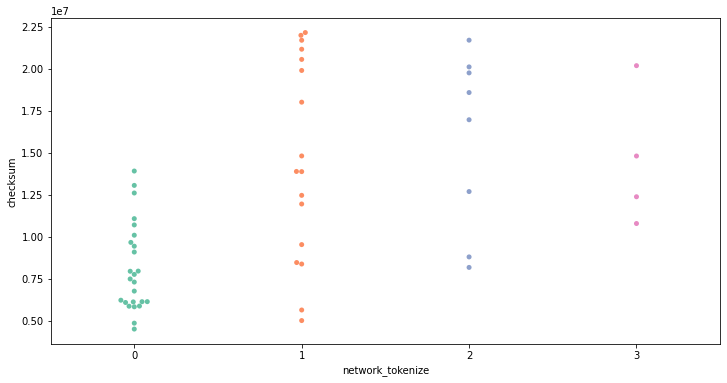

In [ ]:
fig, ax = matplotlib.pyplot.subplots(figsize=(12,6))
seaborn.swarmplot(data=pluto.df_world_tokenize_data,
  x='network_tokenize', 
  y='checksum', 
  palette="Set2",
  ax=ax)
fig.show()

In [ ]:
pluto.df_world_tokenize_data.tail()

,year,average_audience,game_1_audience,game_2_audience,game_3_audience,game_4_audience,game_5_audience,game_6_audience,game_7_audience,total_games_played,losing_team_wins,network_tokenize,winning_team_tokenize,losing_team_tokenize,checksum
49,1973,34750000,27444000.0,35661000.0,38030000.0,36670000.0,37364000.0,28610000.0,39935000.0,7,3,1,18,6,1.989043e+07
50,1972,31508714,22534000.0,27331000.0,37880000.0,38210000.0,23120000.0,30048000.0,41438000.0,7,3,1,18,21,1.800512e+07
51,1971,24298571,24778000.0,13633000.0,13633000.0,38898000.0,13633000.0,28095000.0,37420000.0,7,3,1,22,20,1.388504e+07
52,1970,11708000,14120000.0,13400000.0,10340000.0,10340000.0,10340000.0,0.0,0.0,5,1,1,21,21,5.017858e+06
53,1969,13174000,14920000.0,17080000.0,11290000.0,11290000.0,11290000.0,0.0,0.0,5,1,1,19,20,5.646144e+06


## Scratch

In [ ]:
## scratch

In [ ]:
pluto.df_bank_data['hash'] = pluto.df_bank_data.apply(lambda x: numpy.log(numpy.abs(hash(tuple(x)))), axis = 1)

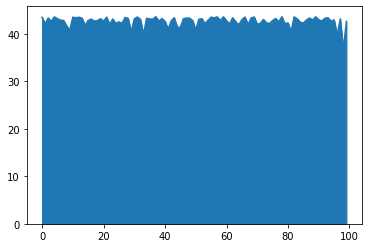

In [ ]:
pluto.df_bank_data['hash'].head(100).plot.area()

In [ ]:
pluto.df_bank_data['hash2'] = pluto.df_bank_data['hash'].apply(lambda x: x - 30.335332546024517)

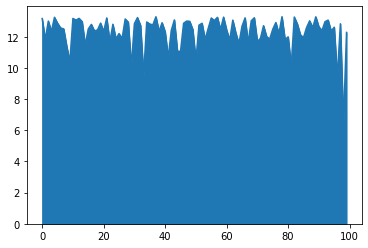

In [ ]:
pluto.df_bank_data['hash2'].head(100).plot.area()

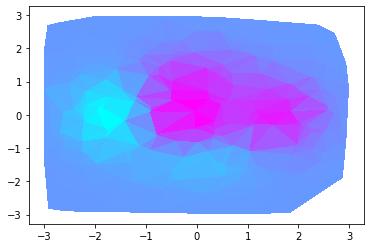

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# plt.style.use('_mpl-gallery-nogrid')

# make data:
np.random.seed(1)
x = np.random.uniform(-3, 3, 256)
y = np.random.uniform(-3, 3, 256)
z = (1 - x/2 + x**5 + y**3) * np.exp(-x**2 - y**2)

# plot:
fig, ax = plt.subplots()

# ax.plot(x, y, 'o', markersize=2, color='grey')
ax.tripcolor(x, y, z, cmap='cool')

# ax.set(xlim=(-3, 3), ylim=(-3, 3))

plt.show()

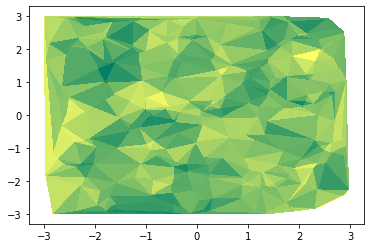

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# plt.style.use('_mpl-gallery-nogrid')

# make data:
# np.random.seed(1)
x = np.random.uniform(-3, 3, 256)
y = np.random.uniform(-3, 3, 256)
# z = (1 - x/2 + x**5 + y**3) * np.exp(-x**2 - y**2)
z = np.random.uniform(0, 10, 256)

# plot:
fig, ax = plt.subplots()

# ax.plot(x, y, 'o', markersize=2, color='grey')
ax.tripcolor(x, y, z, cmap='summer')

# ax.set(xlim=(-3, 3), ylim=(-3, 3))

plt.show()

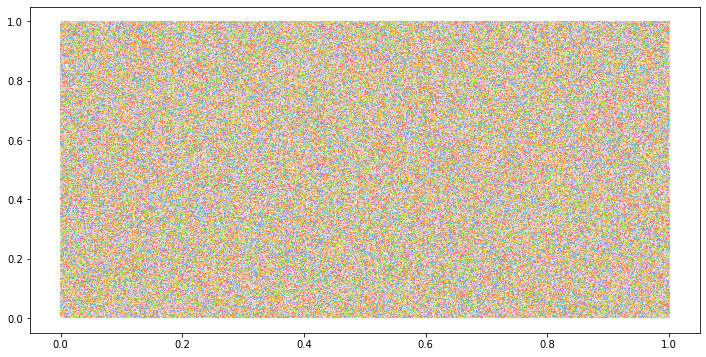

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# plt.style.use('_mpl-gallery-nogrid')

# make data:
# np.random.seed(1)
x = np.random.random_sample(1000000)
y = np.random.random_sample(1000000)
# z = (1 - x/2 + x**5 + y**3) * np.exp(-x**2 - y**2)
z = np.random.random_sample(1000000)

# plot:
fig, ax = plt.subplots(figsize=(12,6))

# ax.plot(x, y, 'o', markersize=2, color='grey')
ax.tripcolor(x, y, z, cmap='Set3')

# ax.set(xlim=(-3, 3), ylim=(-3, 3))

plt.show()

In [ ]:
numpy.random.random_sample?

In [ ]:
pluto.df_bank_data['hash2'] = pluto.df_bank_data['hash'].apply(lambda x:numpy.log(x))

In [ ]:
pluto.df_bank_data['hash'].tail()

999995    43.524897
999996    43.373665
999997    42.966634
999998    43.531664
999999    41.753716
Name: hash, dtype: float64

In [ ]:
pluto.df_bank_data['hash2'].tail()

999995    3.773333
999996    3.769852
999997    3.760424
999998    3.773489
999999    3.731788
Name: hash2, dtype: float64

In [ ]:
pluto.df_bank_data['hash'].max()

43.668270967662195

In [ ]:
pluto.df_bank_data['hash'].min()

30.335332546024517

In [ ]:
numpy.linspace?

In [ ]:
numpy.log(68525370175581245)

38.76598043913648

In [ ]:
str(pluto.df_bank_tokenize_data.head(1))

'   fraud_bool  income  name_email_similarity  prev_address_months_count  \\\n0           1     0.9               0.166828                         -1   \n\n   current_address_months_count  customer_age  days_since_request  \\\n0                            88            50            0.020925   \n\n   intended_balcon_amount  zip_count_4w   velocity_6h  ...  \\\n0               -1.331345           769  10650.765523  ...   \n\n   session_length_in_minutes  keep_alive_session  device_distinct_emails_8w  \\\n0                   3.888115                   0                          1   \n\n   device_fraud_count  month  payment_type_tokenize  \\\n0                   0      7                      0   \n\n   employment_status_tokenize  housing_status_tokenize  source_tokenize  \\\n0                           0                        0                0   \n\n   device_os_tokenize  \n0                   0  \n\n[1 rows x 32 columns]'

In [ ]:
pluto.df_bank_tokenize_data.shape

(1000000, 32)

In [ ]:
pluto.df_bank_tokenize_data[0]

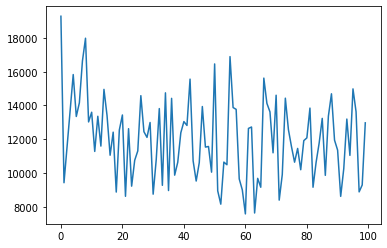

In [ ]:
pluto.df_bank_tokenize_data.head(100).sum(axis=1).plot()

In [ ]:
pandas.plotting.andrews_curves?

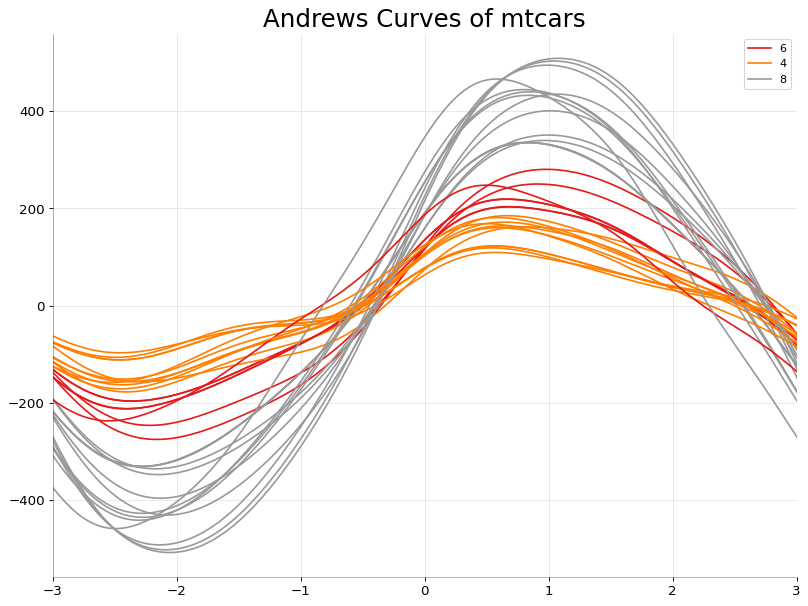

In [ ]:
from pandas.plotting import andrews_curves

# Import
df = pandas.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")
df.drop(['cars', 'carname'], axis=1, inplace=True)

# Plot
plt.figure(figsize=(12,9), dpi= 80)
andrews_curves(df, 'cyl', colormap='Set1')

# Lighten borders
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)

plt.title('Andrews Curves of mtcars', fontsize=22)
plt.xlim(-3,3)
plt.grid(alpha=0.3)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast
0,4.582576,6,160.0,110,3.90,2.620,16.46,0,1,4,4,1
1,4.582576,6,160.0,110,3.90,2.875,17.02,0,1,4,4,1
2,4.774935,4,108.0,93,3.85,2.320,18.61,1,1,4,1,1
3,4.626013,6,258.0,110,3.08,3.215,19.44,1,0,3,1,1
4,4.324350,8,360.0,175,3.15,3.440,17.02,0,0,3,2,1


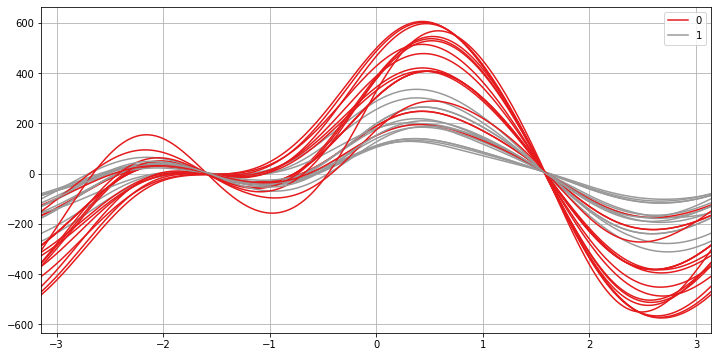

In [ ]:
plt.figure(figsize=(12,6))
pandas.plotting.andrews_curves(df, 'vs',colormap='Set1')

In [ ]:
matplotlib.pyplot.figure(figsize=(12,6))
pandas.plotting.andrews_curves(pluto.df_bank_tokenize_data.head(1000), 'fraud_bool',colormap='Set1')

NameError: ignored

In [ ]:
pluto.df_bank_footprint = pluto.df_bank_tokenize_data.sum(axis=1)

In [ ]:
pluto.df_bank_footprint.head(100).plot.area()

NameError: ignored

In [ ]:
pluto.df_bank_footprint

0         19284.377415
1          9426.448075
2         11556.772951
3         13700.155658
4         15831.752593
              ...     
999995    22498.106664
999996    19261.678550
999997    22044.539530
999998    20578.701845
999999    15806.451728
Length: 1000000, dtype: float64

In [ ]:
! pip install pywaffle
# Reference: https://stackoverflow.com/questions/41400136/how-to-do-waffle-charts-in-python-square-piechart
from pywaffle import Waffle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.1/25.1 MB 43.5 MB/s eta 0:00:00


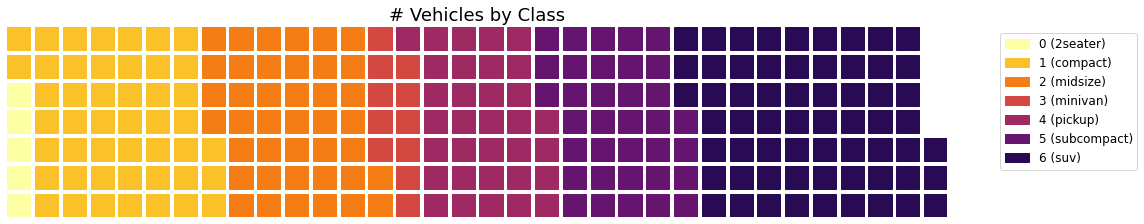

In [ ]:
# ! pip install pywaffle
# # Reference: https://stackoverflow.com/questions/41400136/how-to-do-waffle-charts-in-python-square-piechart
# from pywaffle import Waffle

# Import
df_raw = pandas.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

# Prepare Data
df = df_raw.groupby('class').size().reset_index(name='counts')
n_categories = df.shape[0]
colors = [matplotlib.pyplot.cm.inferno_r(i/float(n_categories)) for i in range(n_categories)]

# Draw Plot and Decorate
fig = matplotlib.pyplot.figure(
    FigureClass=Waffle,
    plots={
        '111': {
            'values': df['counts'],
            'labels': ["{0} ({1})".format(n[0], n[1]) for n in df[['class', 'counts']].itertuples()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12},
            'title': {'label': '# Vehicles by Class', 'loc': 'center', 'fontsize':18}
        },
    },
    rows=7,
    colors=colors,
    figsize=(16, 9)
)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   7 non-null      object
 1   counts  7 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 240.0+ bytes


In [ ]:
df.head(3)

,class,counts
0,2seater,5
1,compact,47
2,midsize,41


In [ ]:
df_1col = pluto.df_bank_data.payment_type
arr = numpy.array(df_1col.unique())
def fetch_token_index(val):
  for i, x in enumerate(arr):
    if (val == x):
      return i

In [ ]:
pluto.df_bank_data['payment_type_token'] = pluto.df_bank_data['payment_type'].apply(fetch_token_index)

In [ ]:
pluto.df_bank_data[['payment_type', 'payment_type_token']].head(10)

,payment_type,payment_type_token
0,AA,0
1,AB,1
2,AC,2
3,AB,1
4,AB,1
5,AD,3
6,AB,1
7,AB,1
8,AB,1
9,AB,1


In [ ]:
def fetch_token_index2(val, xarr):
  # print('xarr=',xarr,' :val=',val)
  for i, x in enumerate(xarr):
    # print(i,x)
    if (val == x):
      return i
emp = pluto.df_bank_data.employment_status.unique()
emp = numpy.array(emp)
pluto.df_bank_data['employment_status_token'] = pluto.df_bank_data['employment_status'].apply(
  fetch_token_index2, args=(emp,))

In [ ]:
pluto.df_bank_data[['employment_status', 'employment_status_token']].head(10)

,employment_status,employment_status_token
0,CA,0
1,CA,0
2,CB,1
3,CA,0
4,CA,0
5,CA,0
6,CA,0
7,CB,1
8,CC,2
9,CB,1


In [ ]:
import pandas as pd

def sum(x, y, z):
  return x + y + z

df = pd.DataFrame({'A': [1, 2], 'B': [10, 20]})

x1 = 1
x2 = 5
df1 = df.apply(sum, args=(x1, x2))
print(df.head())
df1.head()

   A   B
0  1  10
1  2  20


,A,B
0,7,16
1,8,26


In [ ]:
import pandas as pd

def sum(x, z):
  return x + z

df = pd.DataFrame({'A': [1, 2], 'B': [10, 20]})

x1 = 1
x2 = 5
df1 = df.apply(sum, args=(x1,))
print(df.head())
df1.head()

   A   B
0  1  10
1  2  20


,A,B
0,2,11
1,3,21


In [ ]:
cat = numpy.array(pluto.df_bank_data.payment_type.unique())

In [ ]:
cat

array(['AA', 'AB', 'AC', 'AD', 'AE'], dtype=object)

In [ ]:
def findme(lst, a):
  for i, x in enumerate(lst):
    print (i, x)
    if (a == x):
      return i

In [ ]:
findme(cat, 'AA')

0 AA


0

In [ ]:
findme(cat, 'AD')

0 AA
1 AB
2 AC
3 AD


3

In [ ]:
f = '/content/kaggle/bank-account-fraud-dataset-neurips-2022/Variant_I.csv'
pluto.df_bank_v1_data = pluto.fetch_df(f)
pluto.df_bank_v1_data.head(3)

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.6,0.252681,-1,188,20,0.021614,-0.266603,AC,2596,...,0,1000.0,1,INTERNET,7.634858,linux,0,1,0,5
1,0,0.9,0.185206,-1,51,30,0.001696,-1.191015,AD,898,...,0,1500.0,0,INTERNET,5.408299,other,0,1,0,4
2,0,0.1,0.505509,-1,187,20,0.011880,-1.252679,AB,2851,...,0,500.0,0,INTERNET,9.401087,linux,1,1,0,5


In [ ]:
pluto.df_bank_v1_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

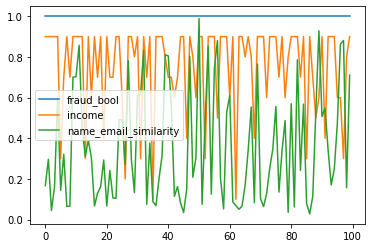

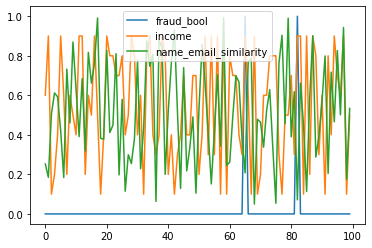

In [ ]:
pluto.df_bank_data[["fraud_bool", "income", "name_email_similarity"]].head(100).plot()
pluto.df_bank_v1_data[["fraud_bool", "income", "name_email_similarity"]].head(100).plot()

- time to read the description

-fun fact
- reach out to expert, you are data scientest, and not exspect to be expert in all data type

### read variant

In [ ]:
# remove white space in directory and filename
# run this until no error/output
f = 'kaggle/bank-account-fraud-dataset-neurips-2022'
#!find {f} -name "* *" -type d | rename 's/ /_/g'
!find {f} -name "* *" -type f | rename 's/ /_/g'

In [ ]:
# %%writefile -a {pluto_chapter_7}

pluto.version = 7.0
# augment full path
@add_method(PacktDataAug)
def _append_music_full_path(self,x):
  y = re.findall('([a-zA-Z ]*)\d*.*', x)[0]
  return (f'kaggle/musical-emotions-classification/Audio_Files/Audio_Files/Train/{y}/{x}')
#
@add_method(PacktDataAug)
def fetch_music_full_path(self, df):
  df['fname'] = df.ImageID.apply(self._append_music_full_path)
  return df

In [ ]:
pluto.fetch_music_full_path(pluto.df_music_data)
pluto.df_music_data.head(3)

## Human Speech

In [ ]:
%%time
url = 'https://www.kaggle.com/datasets/ejlok1/cremad'
pluto.fetch_kaggle_dataset(url)

In [ ]:
# /content/kaggle/cremad/AudioWAV/1001_DFA_ANG_XX.wav
# change method name to make_dir_dframe
f = 'kaggle/cremad/AudioWAV'
pluto.df_voice_data = pluto.make_dir_dataframe(f)
pluto.df_voice_data.head(3)

In [ ]:
pluto.df_voice_data.head(3)

## Urban sound

In [ ]:
%%time
url = 'https://www.kaggle.com/datasets/rupakroy/urban-sound-8k'
pluto.fetch_kaggle_dataset(url)

In [ ]:
# /content/kaggle/urban-sound-8k/UrbanSound8K/UrbanSound8K/audio/fold1
# change method name to make_dir_dframe
f = 'kaggle/urban-sound-8k/UrbanSound8K/UrbanSound8K/audio'
pluto.df_sound_data = pluto.make_dir_dataframe(f)
pluto.df_sound_data.head(3)

# View and Listen

In [ ]:
# %%writefile -a {pluto_chapter_7}

import IPython
import IPython.display
import librosa
import librosa.display
import matplotlib
import pandas
import numpy
import re

In [ ]:
# %%writefile -a {pluto_chapter_7}

@add_method(PacktDataAug)
def _draw_area_with_neg(self,ndata,pic,tcolor='#007bff',bcolor='#ffc107',alpha=0.75,istart=0,izero=0):
  nlen = len(ndata)
  i = numpy.arange(istart, istart+nlen)
  xzero = numpy.zeros(nlen)
  xzero += izero
  # plot line
  pic.plot(i,ndata, linewidth=0.0)  # invisible line for shading
  pic.plot(i,xzero,color='gray',linewidth=0.5) # base line

  # fill top/positive section
  pic.fill_between(
    i, xzero, ndata, where=(ndata >= xzero), 
    interpolate=True, color=tcolor, alpha=alpha, 
    label="Positive"
  )
  # fill bottom/negative section
  pic.fill_between(
    i, xzero, ndata, where=(ndata < xzero), 
    interpolate=True, color=bcolor, alpha=alpha, 
    label="Negative"
  )
  return
#
@add_method(PacktDataAug)
def _fetch_audio_data(self,lname):
  # select random record
  # samp = df.sample(xsize)
  # samp.reset_index(drop=True, inplace=True)
  data_amp, sam_rate = librosa.load(lname, mono=True)
  fname = re.findall('[^\/]+$', lname)
  return data_amp, sam_rate, fname[0]
#
@add_method(PacktDataAug)
def _draw_audio(self,data_amp, sam_rate, fname):
  # define constant
  zlen = 100
  nrow = 2
  ncol = 1
  w = 11
  h = 6
  title = ['', 'Zoom In: From Mid-point to 100+']
  ylabel = ['Waveform Amplitude']
  #
  # define graph
  canvas, pic = matplotlib.pyplot.subplots(nrow, ncol, figsize=(w, h))
  pics = pic.flatten()
  # draw original
  dlen = len(data_amp)
  self._draw_area_with_neg(data_amp,pic[0])
  pics[0].set_title(f'{title[0]} {fname}', fontsize=18.)
  pics[0].set_xlabel(f'Second: Total {dlen/sam_rate:.2f} sec., Sampling Rate: {sam_rate/1000:.2f} kHz', fontsize=16.)
  pics[0].set_ylabel(ylabel[0])
  #
  # overide tick with time
  loc = numpy.array(pics[0].get_xticks())
  b = loc / sam_rate
  b = numpy.round(b,1)
  pics[0].set_xticklabels(b)
  pics[0].grid()
  #
  # draw zoom
  mid = int(len(data_amp) / 2)
  end = mid + zlen
  self._draw_area_with_neg(data_amp[mid:end],pic[1])
  pics[1].set_title(title[1],fontsize=18.)
  pics[1].set_xlabel(f'Time Series Index: Mid-point at {mid/sam_rate:.2f} sec. ({mid} ts)', fontsize=16.)
  pics[1].set_ylabel(ylabel[0])
  pics[1].grid()
  # 
  # display and save image
  canvas.tight_layout()
  self._drop_image(canvas)
  canvas.show()
  # 
  return 
#
@add_method(PacktDataAug)
def draw_audio(self,df):
  samp = df.sample(1)
  samp.reset_index(drop=True, inplace=True)
  data_amp, sam_rate, fname = self._fetch_audio_data(samp.fname[0])
  self._draw_audio(data_amp, sam_rate, 'Original: ' + fname)
  # display audio 
  display(IPython.display.Audio(data_amp,rate=sam_rate))
  return
#

In [ ]:
pluto.draw_audio(pluto.df_music_data)

In [ ]:
pluto.draw_audio(pluto.df_voice_data)

In [ ]:
pluto.draw_audio(pluto.df_sound_data)

# Audio Control D-scale 

- pitches D, E, F♯, G, A, B, and C♯

In [ ]:
# 

f = 'Data-Augmentation-with-Python/pluto_data/control-d-major.mp3'
data_amp, sam_rate, fname = pluto._fetch_audio_data(f)
pluto.audio_control_dmajor = [data_amp, sam_rate, fname, f]
pluto._draw_audio(data_amp, sam_rate, 'Original: ' + fname)
# display audio 
display(IPython.display.Audio(data_amp, rate=sam_rate))

In [ ]:
pluto.audio_control_dmajor

# Augmentation standard functions

- basic audio augmentation
  - Time shifting
  - Time stretching
  - Pitch scaling
  - Noise addition
  - Polarity Inversion
- Filters and masking
  - Filters


# Time shift

In [ ]:
# %CARRY-OVER

!pip install audiomentations

In [ ]:
# %%writefile -a {pluto_chapter_7}

import audiomentations
#
@add_method(PacktDataAug)
def _fetch_1_sample(self, df, dsize=1):
  p = df.sample(dsize)
  p.reset_index(drop=True, inplace=True)
  return p.fname[0]
#
@add_method(PacktDataAug)
def _audio_transform(self, df, xtransform, title=''):
  if (type(df) is list):
    data_amp, sam_rate, fname, lname = self.audio_control_dmajor
  else:
    lname = self._fetch_1_sample(df)
    data_amp, sam_rate, fname = self._fetch_audio_data(lname)
  #
  xaug = xtransform(data_amp, sample_rate=sam_rate)
  # augmented
  self._draw_audio(xaug, sam_rate, title + ' Augmented: ' + fname)
  display(IPython.display.Audio(xaug, rate=sam_rate))
  # original
  self._draw_audio(data_amp, sam_rate, 'Original: ' + fname)
  display(IPython.display.Audio(data_amp, rate=sam_rate))
  return

In [ ]:
# %%writefile -a {pluto_chapter_7}

@add_method(PacktDataAug)
def play_aug_time_shift(self, df, min_fraction=-0.2,max_fraction=0.8,rollover=True,title='Time Shift'):
  xtransform = audiomentations.Shift(
    min_fraction = min_fraction,
    max_fraction = max_fraction,
    rollover = rollover,
    p=1.0
  )
  self._audio_transform(df, xtransform, title=title)
  return

In [ ]:
pluto.play_aug_time_shift(pluto.df_music_data, min_fraction=0.5)

In [ ]:
pluto.play_aug_time_shift(pluto.df_voice_data, min_fraction=0.5)

In [ ]:
pluto.play_aug_time_shift(pluto.df_sound_data, min_fraction=0.5)

In [ ]:
pluto.play_aug_time_shift(pluto.audio_control_dmajor, min_fraction=0.2)

# Time stretch

In [ ]:
# %%writefile -a {pluto_chapter_7}

@add_method(PacktDataAug)
def play_aug_time_stretch(self, df, min_rate=0.2,max_rate=6.8,leave_length_unchanged=True,title='Time Stretch'):
  xtransform = audiomentations.TimeStretch(
    min_rate = min_rate,
    max_rate = max_rate,
    leave_length_unchanged = leave_length_unchanged,
    p=1.0
  )
  self._audio_transform(df, xtransform, title=title)
  return
  # librosa.effects.time_stretch under the hood 

In [ ]:
pluto.play_aug_time_stretch(pluto.audio_control_dmajor, max_rate=5.4)

In [ ]:
pluto.play_aug_time_stretch(pluto.df_music_data, max_rate=3.0)

In [ ]:
pluto.play_aug_time_stretch(pluto.df_voice_data, max_rate=3.5)

In [ ]:
pluto.play_aug_time_stretch(pluto.df_sound_data, max_rate=2.5)


In [ ]:
pluto.fname_id

# Pitch scaling

In [ ]:
# %%writefile -a {pluto_chapter_7}

@add_method(PacktDataAug)
def play_aug_pitch_scaling(self, df, min_semitones=-6.0,max_semitones=6.0,title='Pitch Scaling'):
  xtransform = audiomentations.PitchShift(
    min_semitones = min_semitones,
    max_semitones = max_semitones,
    p=1.0)
  self._audio_transform(df, xtransform, title=title)
  return

In [ ]:
pluto.play_aug_pitch_scaling(pluto.audio_control_dmajor,min_semitones=-6.0,max_semitones=6.0)

In [ ]:
pluto.fname_id

In [ ]:
pluto.play_aug_pitch_scaling(pluto.df_music_data,min_semitones=-11.0, max_semitones=-9.0)

In [ ]:
pluto.play_aug_pitch_scaling(pluto.df_voice_data,min_semitones=-6.0, max_semitones=6.0)

In [ ]:
pluto.play_aug_pitch_scaling(pluto.df_sound_data,min_semitones=4.0, max_semitones=11.0)

# Noise injection, add Gaussian noise

In [ ]:
# %%writefile -a {pluto_chapter_7}

@add_method(PacktDataAug)
def play_aug_noise_injection(self, df, min_amplitude=0.002,max_amplitude=0.2,title='Gaussian noise injection'):
  xtransform = audiomentations.AddGaussianNoise(
    min_amplitude = min_amplitude,
    max_amplitude = max_amplitude,
    p=1.0)
  self._audio_transform(df, xtransform, title=title)
  return

In [ ]:
pluto.play_aug_noise_injection(pluto.audio_control_dmajor, min_amplitude=0.02,max_amplitude=0.05)

In [ ]:
pluto.fname_id

In [ ]:
pluto.play_aug_noise_injection(pluto.df_music_data, max_amplitude=0.01)

In [ ]:
pluto.play_aug_noise_injection(pluto.df_voice_data, max_amplitude=0.01)

In [ ]:
pluto.play_aug_noise_injection(pluto.df_sound_data, max_amplitude=0.022)

# Polarity Inversion

In [ ]:
# %%writefile -a {pluto_chapter_7}

@add_method(PacktDataAug)
def play_aug_polar_inverse(self, df, title='Polarity inversion'):
  xtransform = audiomentations.PolarityInversion(
    p=1.0)
  self._audio_transform(df, xtransform, title=title)
  return

In [ ]:
pluto.play_aug_polar_inverse(pluto.audio_control_dmajor)

In [ ]:
pluto.play_aug_polar_inverse(pluto.df_voice_data)

# Low pass Filter

In [ ]:
# %%writefile -a {pluto_chapter_7}

@add_method(PacktDataAug)
def play_aug_low_pass_filter(self, df, 
  min_cutoff_freq=150, max_cutoff_freq=7500,
  min_rolloff=12, max_rolloff=24,
  title='Low pass filter'):
  xtransform = audiomentations.LowPassFilter(
    min_cutoff_freq = min_cutoff_freq,
    max_cutoff_freq = max_cutoff_freq,
    min_rolloff = min_rolloff,
    max_rolloff = max_rolloff,
    p=1.0)
  self._audio_transform(df, xtransform, title=title)
  return

In [ ]:
pluto.play_aug_low_pass_filter(pluto.audio_control_dmajor)

In [ ]:
pluto.play_aug_low_pass_filter(pluto.df_music_data)

In [ ]:
pluto.play_aug_low_pass_filter(pluto.df_voice_data)

In [ ]:
pluto.play_aug_low_pass_filter(pluto.df_sound_data)

#High pass filter

In [ ]:
# %%writefile -a {pluto_chapter_7}

@add_method(PacktDataAug)
def play_aug_high_pass_filter(self, df, 
  min_cutoff_freq=20, max_cutoff_freq=2400,
  min_rolloff=12, max_rolloff=24,
  title='High pass filter'):
  xtransform = audiomentations.HighPassFilter(
    min_cutoff_freq = min_cutoff_freq,
    max_cutoff_freq = max_cutoff_freq,
    min_rolloff = min_rolloff,
    max_rolloff = max_rolloff,
    p=1.0)
  self._audio_transform(df, xtransform, title=title)
  return

In [ ]:
pluto.play_aug_high_pass_filter(pluto.audio_control_dmajor)

In [ ]:
pluto.play_aug_high_pass_filter(pluto.df_music_data)

In [ ]:
pluto.play_aug_high_pass_filter(pluto.df_voice_data)

In [ ]:
pluto.play_aug_high_pass_filter(pluto.df_sound_data)

# Band pass filter

In [ ]:
# %%writefile -a {pluto_chapter_7}

@add_method(PacktDataAug)
def play_aug_band_pass_filter(self, df, 
  min_center_freq=200, max_center_freq=4000,
  min_bandwidth_fraction=0.5,max_bandwidth_fraction=1.99,
  min_rolloff=12, max_rolloff=24,
  title='Band pass filter'):
  xtransform = audiomentations.BandPassFilter(
    min_center_freq = min_center_freq,
    max_center_freq = max_center_freq,
    min_bandwidth_fraction = min_bandwidth_fraction,
    max_bandwidth_fraction = max_bandwidth_fraction,
    min_rolloff = min_rolloff,
    max_rolloff = max_rolloff,
    p=1.0)
  self._audio_transform(df, xtransform, title=title)
  return

In [ ]:
pluto.play_aug_band_pass_filter(pluto.audio_control_dmajor)

In [ ]:
pluto.play_aug_band_pass_filter(pluto.df_music_data)

In [ ]:
pluto.play_aug_band_pass_filter(pluto.df_voice_data)

In [ ]:
pluto.play_aug_band_pass_filter(pluto.df_sound_data)

# Sneak peek (Optional)

In [ ]:
pluto.text_marry_lamb = 'Mary had a little lamb, whose fleece was white as snow. And everywhere that Mary went, the lamb was sure to go.'

In [ ]:
x = numpy.array([ord(c) for c in pluto.text_marry_lamb])

In [ ]:
k = pandas.DataFrame(x, columns=['tdata'])
k.head()

In [ ]:
canvas, pic = matplotlib.pyplot.subplots(1, 1, figsize=(11, 4))
# pics = pic.flatten()
pluto._draw_area_with_neg(x,pic,izero=64)
pic.set_title('Text Time-series graph: Marry had a little lamb...', fontsize=18.)
pic.set_xlabel('Character, letters are blue, punctuations are yellow', fontsize=16.)
pic.set_ylabel('ASCII value')
pic.grid()
# 
# display and save image
canvas.tight_layout()
pluto._drop_image(canvas)
canvas.show()

In [ ]:
print('End of chapter 7')

# Push up all changes (Optional)

- username: duchaba

- password: [use the token]

In [ ]:
# import os
# f = 'Data-Augmentation-with-Python'
# os.chdir(f)
# !git add -A
# !git config --global user.email "duc.haba@gmail.com"
# !git config --global user.name "duchaba"
# !git commit -m "end of session"
# # do the git push in the xterm console
# #!git push

In [ ]:
# %%script false --no-raise-error  #temporary stop execute for export file

# Summary 

Every chaper will begin with same base class "PacktDataAug".

✋ FAIR WARNING:

- The coding uses long and complete function path name.

- Pluto wrote the code for easy to understand and not for compactness, fast execution, nor cleaverness.

- Use Xterm to debug cloud server



In [ ]:
# !pip install colab-xterm
# %load_ext colabxterm
# %xterm